# Madi VanZant Project Proposal

-------------------------------------------

# Data from Kaggle

In [102]:
import pandas as pd
import numpy as np

In [103]:

kaggle_df = pd.read_csv("collegefootballbowl.csv")
del kaggle_df['winner_rank']
del kaggle_df['loser_rank']

In [104]:
kaggle_df.head(40)

,id,year,date,day,winner_tie,winner_points,loser_tie,loser_points,attendance,mvp,sponsor,bowl_name
0,1,2021,12/29/2021,Wed,Oklahoma,47,Oregon,32,59121.0,"Oklahoma RB Kennedy Brooks, Oklahoma S Pat Fields",Valero,Alamo Bowl
1,2,2020,12/29/2020,Tue,Texas,55,Colorado,23,10822.0,"Texas RB Bijan Robinson, Texas LB DeMarvion Ov...",Valero,Alamo Bowl
2,3,2019,12/31/2019,Tue,Texas,38,Utah,10,60147.0,"Texas QB Sam Ehlinger, Texas LB Joseph Ossai",Valero,Alamo Bowl
3,4,2018,12/28/2018,Fri,Washington State,28,Iowa State,26,60675.0,"Washington State QB Gardner Minshew, Washingto...",Valero,Alamo Bowl
4,5,2017,12/28/2017,Thu,Texas Christian,39,Stanford,37,57653.0,"TCU QB Kenny Hill, TCU LB Travin Howard",Valero,Alamo Bowl
5,6,2016,12/29/2016,Thu,Oklahoma State,38,Colorado,8,59815.0,"OSU WR James Washington, OSU DT Vincent Taylor",Valero,Alamo Bowl
6,7,2015,1/2/2016,Sat,Texas Christian,47,Oregon,41,64569.0,"TCU QB Brian Kohlhausen, TCU S Travin Howard",Valero,Alamo Bowl
7,8,2014,1/2/2015,Fri,UCLA,40,Kansas State,35,60517.0,"RB Paul Perkins (UCLA), LB Eric Kendricks (UCLA)",Valero,Alamo Bowl
8,9,2013,12/30/2013,Mon,Oregon,30,Texas,7,65918.0,"QB Marcus Mariota (Oregon), SS Avery Patterson...",Valero Energy Corporation,Alamo Bowl
9,10,2012,12/29/2012,Sat,Texas,31,Oregon State,27,65277.0,"WR Marquise Goodwin (Texas), DL Alex Okafor (T...",Valero Energy Corporation,Alamo Bowl


In [105]:
kaggle_df.dtypes

id                 int64
year               int64
date              object
day               object
winner_tie        object
winner_points      int64
loser_tie         object
loser_points       int64
attendance       float64
mvp               object
sponsor           object
bowl_name         object
dtype: object

# Web Scraping

In [106]:
# Set up
import pandas as pd
import time
import random


from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

# Set up Chrome WebDriver
service = Service(ChromeDriverManager().install())
options = webdriver.ChromeOptions()
options.add_argument("--headless") 
browser = webdriver.Chrome(service=service, options=options)

In [107]:
# More set up



url = "https://www.d1ticker.com/2024-fbs-attendance-trends/"
browser.get(url)

time.sleep(random.uniform(3, 6))

#look for elements, headers
table = browser.find_element(By.TAG_NAME, "table")

headers = [header.text.strip() for header in table.find_elements(By.TAG_NAME, "th")]
#look for elements, rows

table2 = browser.find_element(By.XPATH, '//*[@id="tablepress-11"]/tbody')

rows = []
for row in table2.find_elements(By.TAG_NAME, "tr")[1:]:  # Skip the header row
    cells = row.find_elements(By.TAG_NAME, "td")
    row_data = [cell.text.strip() for cell in cells]
    rows.append(row_data)


browser.quit()
scraped_df = pd.DataFrame(rows, columns=headers)




scraped_df.to_csv('scraped.csv', header=True, index=False, encoding='utf-8')

In [108]:
scraped_df.head(20)

,School,Conference,2024 Current Average,Week-over-Week % Change,2023 Average,Year-over-Year % Change,5 Year Average,5 Year-over-Year % Change,Capacity %
0,Akron,MAC,"6,374",-6.50%,"7,237",-11.92%,"13,021",-51.04%,21.25%
1,Alabama,SEC,"100,077",0.00%,"100,077",0.00%,"100,091",-0.01%,100.00%
2,Appalachian State,Sun Belt,"34,623",0.00%,"34,734",-0.32%,"28,900",19.80%,115.41%
3,Arizona,Big 12,"46,747",1.09%,"47,320",-1.21%,"42,279",10.57%,83.43%
4,Arizona State,Big 12,"48,984",0.00%,"48,301",1.41%,"47,262",3.64%,87.11%
5,Arkansas,SEC,"73,392",0.00%,"65,317",12.36%,"62,914",16.65%,96.30%
6,Arkansas State,Sun Belt,"17,871",-4.80%,"16,747",6.71%,"16,745",6.72%,57.72%
7,Army West Point,American,"26,771",-3.47%,"29,016",-7.74%,"29,521",-9.32%,89.24%
8,Auburn,SEC,"88,043",0.00%,"88,043",0.00%,"85,924",2.47%,100.00%
9,Ball State,MAC,"9,841",0.00%,"10,771",-8.63%,"10,830",-9.13%,43.74%


In [109]:
#scraped_df = scraped_df[scraped_df.School.isin(["Illinois","Indiana", "Iowa", "Maryland", "Michigan", "Michigan State", "Minnesota", "Nebraska", "Northwestern*", "Ohio State", "Penn State", "Purdue", "Rutgers", "Wisconsin"])]

In [110]:
#scraped_df.reset_index()

# Merge Horizontally

In [111]:
# Rename columns
scraped_df = scraped_df.rename(columns={
    "School": "Team",
    "Conference": "Conference",
    "2024 Current Average": "2024 Avg Attendance",
    "2023 Average": "2023 Avg Attendance",
    "5 Year Average": "5 Yr Avg Attendance"
})

In [112]:
# Merge on Winner/Tie to get Winner Conference and attendance data
combined = kaggle_df.merge(scraped_df, left_on="winner_tie", right_on="Team", how="left").rename(columns={
    "Conference": "Winner Conference",
    "2024 Avg Attendance": "Winner 2024 Avg Attendance",
    "2023 Avg Attendance": "Winner 2023 Avg Attendance",
    "5 Yr Avg Attendance": "Winner 5 Yr Avg Attendance",
    "Capacity %": "Winner Capacity %"
}).drop(columns=["Team"])


In [113]:

# Merge on Loser/Tie to get Loser Conference and attendance data
combined = combined.merge(scraped_df, left_on="loser_tie", right_on="Team", how="left").rename(columns={
    "Conference": "Loser Conference",
    "2024 Avg Attendance": "Loser 2024 Avg Attendance",
    "2023 Avg Attendance": "Loser 2023 Avg Attendance",
    "5 Yr Avg Attendance": "Loser 5 Yr Avg Attendance",
    "Capacity %" : "Loser Capacity %",
    "Day" : "Day of the week"
}).drop(columns=["Team"])

combined.shape

(1527, 28)

In [114]:
#oonly keep good columns
final_columns = [
    "winner_tie", "loser_tie", "Winner Conference", "Loser Conference",
    "year", "date", "day", "bowl_name", "winner_points", "loser_points",
    "Winner 2024 Avg Attendance", "Winner 2023 Avg Attendance", "Winner 5 Yr Avg Attendance",
    "Loser 2024 Avg Attendance", "Loser 2023 Avg Attendance", "Loser 5 Yr Avg Attendance",
    "Winner Capacity %", "Loser Capacity %"

]
combined = combined[final_columns]

combined.head()

print(combined.isna().sum())
#drop rows with NA values
combined = combined.dropna()

combined.shape
#we can see that 50 rows are dropped


winner_tie                      0
loser_tie                       0
Winner Conference             343
Loser Conference              321
year                            0
date                            0
day                             0
bowl_name                       0
winner_points                   0
loser_points                    0
Winner 2024 Avg Attendance    343
Winner 2023 Avg Attendance    343
Winner 5 Yr Avg Attendance    343
Loser 2024 Avg Attendance     321
Loser 2023 Avg Attendance     321
Loser 5 Yr Avg Attendance     321
Winner Capacity %             343
Loser Capacity %              321
dtype: int64


(942, 18)

# Loook at dtypes and correct

In [115]:
combined.dtypes
print(combined.isna().sum())
combined.dtypes
combined.head()


winner_tie                    0
loser_tie                     0
Winner Conference             0
Loser Conference              0
year                          0
date                          0
day                           0
bowl_name                     0
winner_points                 0
loser_points                  0
Winner 2024 Avg Attendance    0
Winner 2023 Avg Attendance    0
Winner 5 Yr Avg Attendance    0
Loser 2024 Avg Attendance     0
Loser 2023 Avg Attendance     0
Loser 5 Yr Avg Attendance     0
Winner Capacity %             0
Loser Capacity %              0
dtype: int64


,winner_tie,loser_tie,Winner Conference,Loser Conference,year,date,day,bowl_name,winner_points,loser_points,Winner 2024 Avg Attendance,Winner 2023 Avg Attendance,Winner 5 Yr Avg Attendance,Loser 2024 Avg Attendance,Loser 2023 Avg Attendance,Loser 5 Yr Avg Attendance,Winner Capacity %,Loser Capacity %
0,Oklahoma,Oregon,SEC,Big Ten,2021,12/29/2021,Wed,Alamo Bowl,47,32,"83,513","83,741","83,073","59,104","55,895","53,384",104.23%,109.45%
1,Texas,Colorado,SEC,Big 12,2020,12/29/2020,Tue,Alamo Bowl,55,23,"102,386","101,625","97,565","52,514","53,180","47,579",102.26%,104.64%
2,Texas,Utah,SEC,Big 12,2019,12/31/2019,Tue,Alamo Bowl,38,10,"102,386","101,625","97,565","52,962","52,499","49,833",102.26%,102.95%
3,Washington State,Iowa State,Pac-12,Big 12,2018,12/28/2018,Fri,Alamo Bowl,28,26,"22,413","28,023","27,211","57,884","60,384","58,847",69.50%,94.12%
5,Oklahoma State,Colorado,Big 12,Big 12,2016,12/29/2016,Thu,Alamo Bowl,38,8,"52,202","53,891","53,999","52,514","53,180","47,579",100.00%,104.64%


In [116]:
# Change dtypes
combined['winner_tie'] = combined['winner_tie'].astype('category')
combined['loser_tie'] = combined['loser_tie'].astype('category')
combined['Winner Conference'] = combined['Winner Conference'].astype('category')
combined['Loser Conference'] = combined['Loser Conference'].astype('category')
combined['date'] = combined['date'].astype('datetime64[μs]')
combined['day'] = combined['day'].astype('category')
combined['bowl_name'] = combined['bowl_name'].astype('category')

combined['Winner 2024 Avg Attendance'] = pd.to_numeric(combined['Winner 2024 Avg Attendance'].str.replace(",", ""))
combined['Winner 2024 Avg Attendance'] = combined['Winner 2024 Avg Attendance'].astype(int)
combined['Winner 2023 Avg Attendance'] = pd.to_numeric(combined['Winner 2023 Avg Attendance'].str.replace(",", ""))
combined['Winner 2023 Avg Attendance'] = combined['Winner 2023 Avg Attendance'].astype(int)

combined['Winner 5 Yr Avg Attendance'] = pd.to_numeric(combined['Winner 5 Yr Avg Attendance'].str.replace(",", ""))
combined['Winner 5 Yr Avg Attendance'] = combined['Winner 5 Yr Avg Attendance'].astype(int)

combined['Loser 2024 Avg Attendance'] = pd.to_numeric(combined['Loser 2024 Avg Attendance'].str.replace(",", ""))
combined['Loser 2024 Avg Attendance'] = combined['Loser 2024 Avg Attendance'].astype(int)

combined['Loser 2023 Avg Attendance'] = pd.to_numeric(combined['Loser 2023 Avg Attendance'].str.replace(",", ""))
combined['Loser 2023 Avg Attendance'] = combined['Loser 2023 Avg Attendance'].astype(int)

combined['Loser 5 Yr Avg Attendance'] = pd.to_numeric(combined['Loser 5 Yr Avg Attendance'].str.replace(",", ""))
combined['Loser 5 Yr Avg Attendance'] = combined['Loser 5 Yr Avg Attendance'].astype(int)




In [117]:
combined['Winner Capacity %'] = pd.to_numeric(combined['Winner Capacity %'].str.replace("%", ""))
combined['Winner Capacity %'] = combined['Winner Capacity %'].astype(int)

combined['Loser Capacity %'] = pd.to_numeric(combined['Loser Capacity %'].str.replace("%", ""))
combined['Loser Capacity %'] = combined['Loser Capacity %'].astype(int)

In [118]:
combined.dtypes

winner_tie                          category
loser_tie                           category
Winner Conference                   category
Loser Conference                    category
year                                   int64
date                          datetime64[us]
day                                 category
bowl_name                           category
winner_points                          int64
loser_points                           int64
Winner 2024 Avg Attendance             int32
Winner 2023 Avg Attendance             int32
Winner 5 Yr Avg Attendance             int32
Loser 2024 Avg Attendance              int32
Loser 2023 Avg Attendance              int32
Loser 5 Yr Avg Attendance              int32
Winner Capacity %                      int32
Loser Capacity %                       int32
dtype: object

In [119]:
combined.shape

(942, 18)

In [120]:
combined_project_data = combined
combined_project_data.to_csv("combined_data.csv", header=True, index=False, encoding='utf-8')

In [121]:
# set up
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('combined_data.csv')

# Q1

In [122]:
# --- Univariate Analysis (Q1) ---
# Summary statistics for Winner 5-Year Avg Attendance
print(df['Loser Capacity %'].describe())
print(df['Winner Capacity %'].describe())
diff_cap = df['Winner Capacity %'].describe() - df['Loser Capacity %'].describe()
diff_cap

count    942.000000
mean      87.031847
std       18.915412
min       20.000000
25%       75.000000
50%       96.000000
75%      100.000000
max      117.000000
Name: Loser Capacity %, dtype: float64
count    942.000000
mean      89.111465
std       17.495082
min       20.000000
25%       79.000000
50%       98.000000
75%      101.000000
max      117.000000
Name: Winner Capacity %, dtype: float64


count    0.000000
mean     2.079618
std     -1.420330
min      0.000000
25%      4.000000
50%      2.000000
75%      1.000000
max      0.000000
dtype: float64

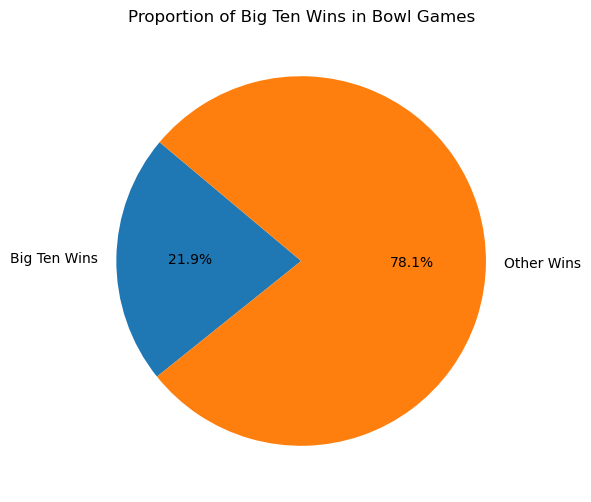

In [123]:
# Filter Big Ten winners
big_ten_wins = df[df['Winner Conference'] == 'Big Ten']

# Count Big Ten Wins
big_ten_win_count = len(big_ten_wins)
total_games = len(df)

# Pie chart: Big Ten Wins vs Others
plt.figure(figsize=(6,6))
plt.pie(
    [big_ten_win_count, total_games - big_ten_win_count],
    labels=['Big Ten Wins', 'Other Wins'],
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Proportion of Big Ten Wins in Bowl Games')
plt.show()


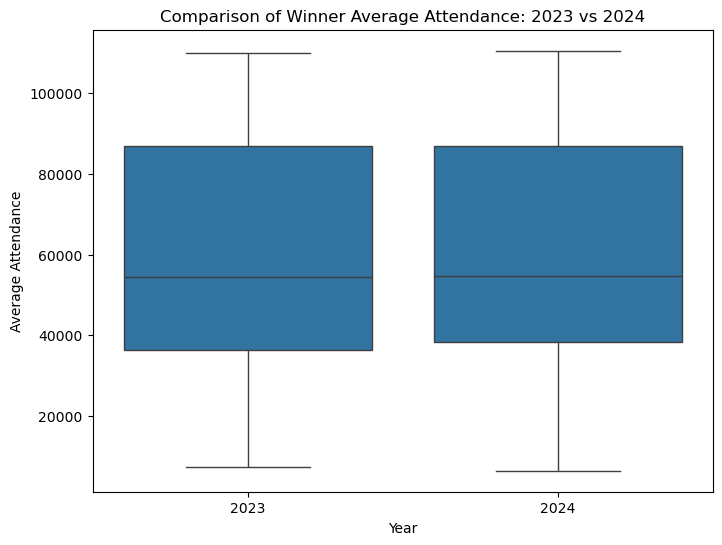

In [124]:
attendance_compare = pd.DataFrame({
    'Year': ['2023'] * len(df) + ['2024'] * len(df),
    'Attendance': pd.concat([df['Winner 2023 Avg Attendance'], df['Winner 2024 Avg Attendance']], ignore_index=True)
})


# Boxplot
plt.figure(figsize=(8,6))
sns.boxplot(x='Year', y='Attendance', data=attendance_compare)
plt.title('Comparison of Winner Average Attendance: 2023 vs 2024')
plt.xlabel('Year')
plt.ylabel('Average Attendance')
plt.show()

# Q2

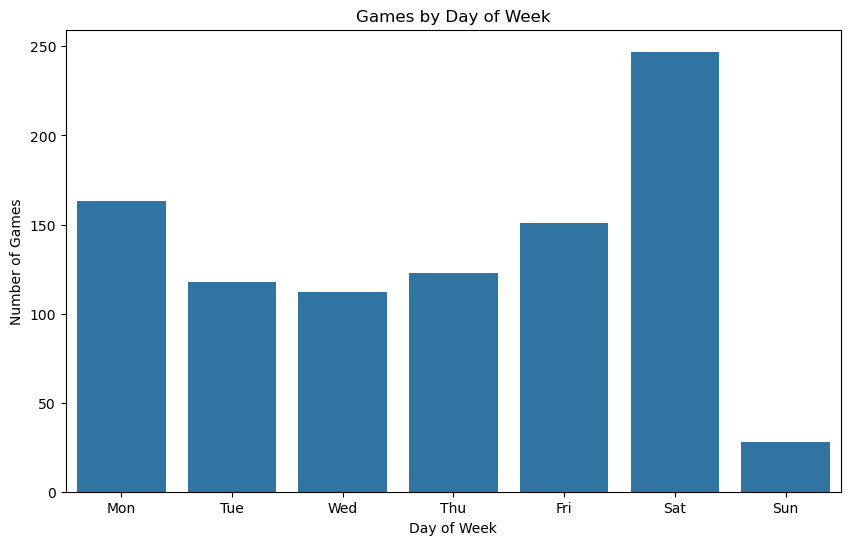

In [125]:
#Bar plt
plt.figure(figsize=(10,6))
sns.countplot(x='day', data=df, order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title('Games by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Games')
plt.show()

In [126]:
# ANOVA: Are point differentials different by day?

#Set up 
df['Point_Diff'] = abs(df['winner_points'] - df['loser_points'])
df['Total_Points'] = df['winner_points'] + df['loser_points']

#Hypothesis
anova_result = stats.f_oneway(*[df[df['day'] == day]['Point_Diff'] for day in df['day'].unique()])
print(f"ANOVA F-statistic (Point Differential by Day): {anova_result.statistic:.3f}, P-value: {anova_result.pvalue:.3f}")

# interpretation
alpha = 0.05  # Significance level
if  anova_result.pvalue > alpha:
    print("The data follows a normal distribution (fail to reject H0).")
else:
    print("The data does not follow a normal distribution (reject H0).")

#Exploratory
anova_total_points = stats.f_oneway(*[df[df['day'] == day]['Total_Points'] for day in df['day'].unique()])
print(f"ANOVA F-statistic (Total Points by Day): {anova_total_points.statistic:.3f}, P-value: {anova_total_points.pvalue:.3f}")

# interpretation
alpha = 0.05  # Significance level
if  anova_total_points.pvalue > alpha:
    print("The data follows a normal distribution (fail to reject H0).")
else:
    print("The data does not follow a normal distribution (reject H0).")


ANOVA F-statistic (Point Differential by Day): 1.238, P-value: 0.284
The data follows a normal distribution (fail to reject H0).
ANOVA F-statistic (Total Points by Day): 0.858, P-value: 0.526
The data follows a normal distribution (fail to reject H0).


# Q3

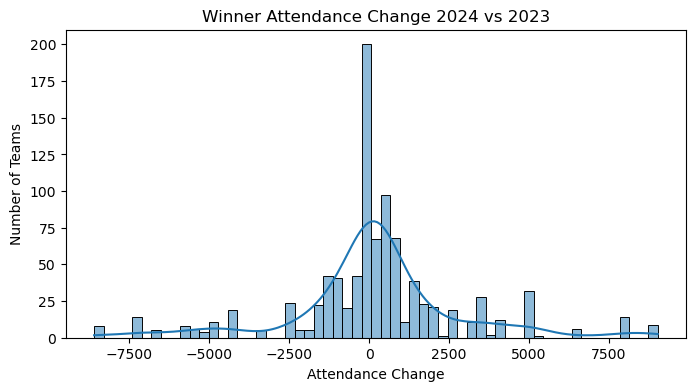

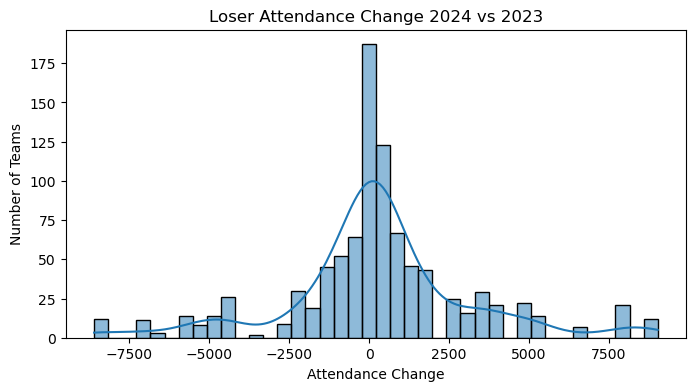

In [127]:
#Set Up 

df['Winner_Attendance_Change'] = df['Winner 2024 Avg Attendance'] - df['Winner 2023 Avg Attendance']
df['Loser_Attendance_Change'] = df['Loser 2024 Avg Attendance'] - df['Loser 2023 Avg Attendance']

#hist plots
plt.figure(figsize=(8,4))
sns.histplot(df['Winner_Attendance_Change'], kde=True)
plt.title('Winner Attendance Change 2024 vs 2023')
plt.xlabel('Attendance Change')
plt.ylabel('Number of Teams')
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(df['Loser_Attendance_Change'], kde=True)
plt.title('Loser Attendance Change 2024 vs 2023')
plt.xlabel('Attendance Change')
plt.ylabel('Number of Teams')
plt.show()



In [128]:
#T-test
t_stat_, p_val = stats.ttest_1samp(df['Winner_Attendance_Change'].dropna(), 0)
print(f"T-statistic (Attendance Change): {t_stat:.3f}, P-value: {p_val:.3f}")


T-statistic (Attendance Change): 51.268, P-value: 0.018


In [129]:
#Log regression
df['Large_Attendance_Growth'] = (df['Winner_Attendance_Change'] > df['Winner_Attendance_Change'].median()).astype(int)

X = df[['Winner 5 Yr Avg Attendance', 'winner_points']]
y = df['Large_Attendance_Growth']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

print(f"Training Accuracy: {model.score(X_train, y_train):.2f}")
print(f"Test Accuracy: {model.score(X_test, y_test):.2f}")

Training Accuracy: 0.52
Test Accuracy: 0.49
